In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
import warnings 
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

In [3]:
mall_customers = pd.read_csv("Mall_Customers.csv")

mall_customers.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = mall_customers.copy()

data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.dtypes.value_counts()

int64     4
object    1
Name: count, dtype: int64

In [6]:
data.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
X = data[['Age','Annual_Income_(k$)']] 

Text(0.5, 1.0, 'Customers')

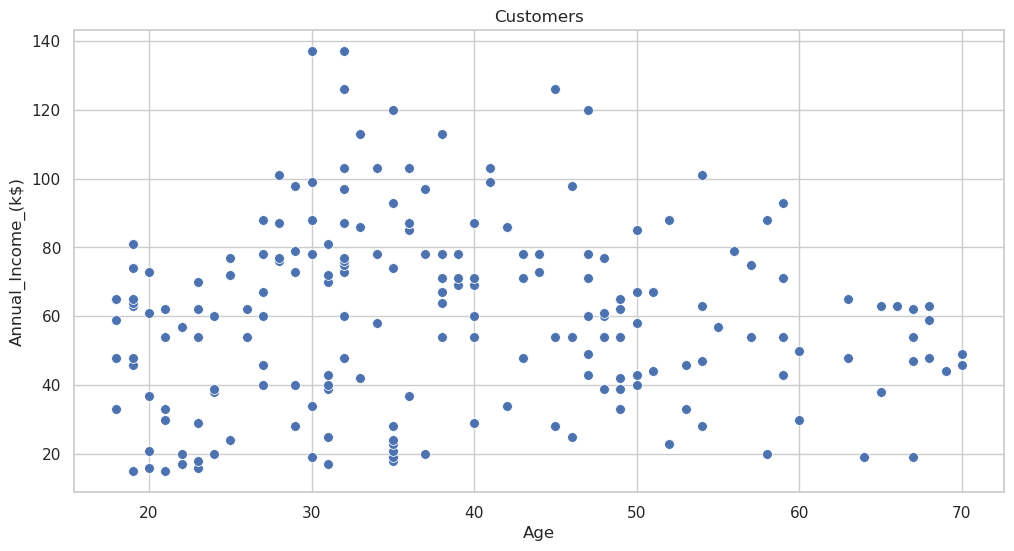

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=X,x='Age', y='Annual_Income_(k$)', palette="Paired", s=50)
plt.title('Customers')


<Axes: >

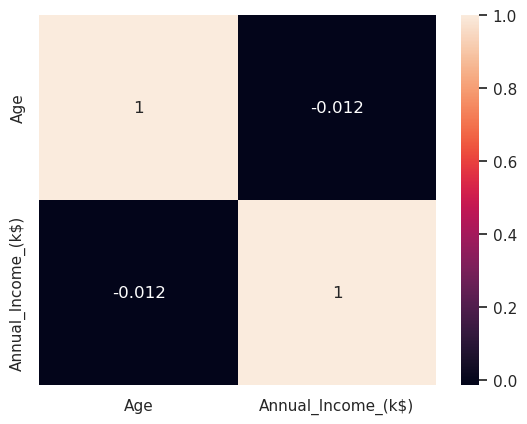

In [9]:
sns.heatmap(X.corr(),annot=True) 

<Axes: >

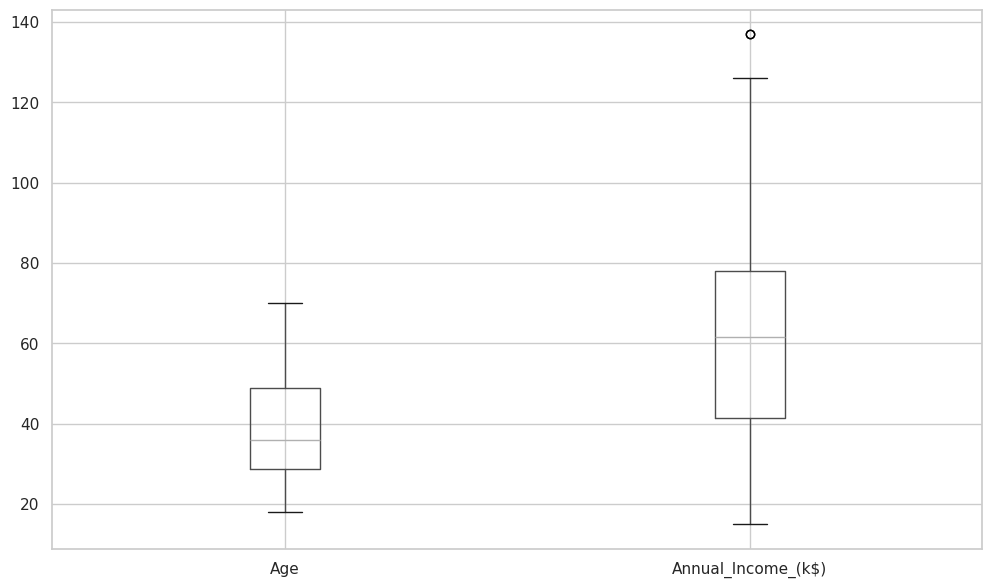

In [10]:
##Visualisation des outliers 

outliers = X.boxplot(figsize=(12,7))
outliers


In [11]:
#X_wo = np.log1p(X)

## Preprocessing

In [12]:
from sklearn.cluster import KMeans

In [13]:
inertias_liste = []

for i in range(1,12):
    model = KMeans(n_clusters=i, init = 'k-means++',random_state=42)

    modele = model.fit(X)

    inertias_liste.append(modele.inertia_)
    
inertias_liste

[176108.78000000003,
 87179.72383252817,
 59525.857573798756,
 39502.77850064538,
 32771.26666666666,
 25747.46456201844,
 22518.27704260651,
 19614.390355731222,
 17770.5656091329,
 14893.920187381056,
 13986.359039109037]

### Elbow's Method using to find the most appropriate number of clusters

Text(0, 0.5, 'Inerties')

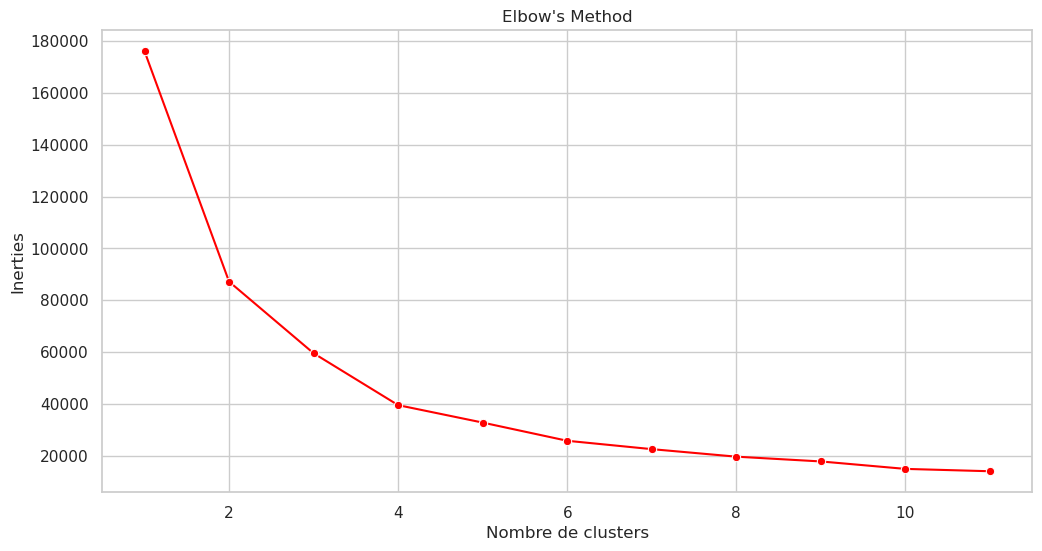

In [14]:

plt.figure(figsize=(12,6)) 
sns.lineplot(x=range(1,12),y=inertias_liste,marker = 'o',color = 'red')
plt.title("Elbow's Method")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inerties")

In [15]:
from kneed import KneeLocator

best_k = KneeLocator(range(1,12),inertias_liste,curve="convex",direction="decreasing").elbow

best_k

np.int64(4)

In [16]:
model_kmeans = KMeans(n_clusters=4,init="k-means++",random_state=1)

y_model = model_kmeans.fit(X)

y_model 

KMeans(n_clusters=4, random_state=1)

In [17]:
y_pred = y_model.predict(X)

In [18]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, y_pred)
print(sil_score)


0.43368606798330267


In [20]:
X["clusters"] = y_pred

X.head()

,Age,Annual_Income_(k$),clusters
0,19,15,2
1,21,15,2
2,20,16,2
3,23,16,2
4,31,17,2


In [21]:
centroides = pd.DataFrame(model_kmeans.cluster_centers_ )

centroides

,0,1
0,55.660714,51.017857
1,39.000000,106.500000
2,29.446809,29.212766
3,31.958904,72.958904


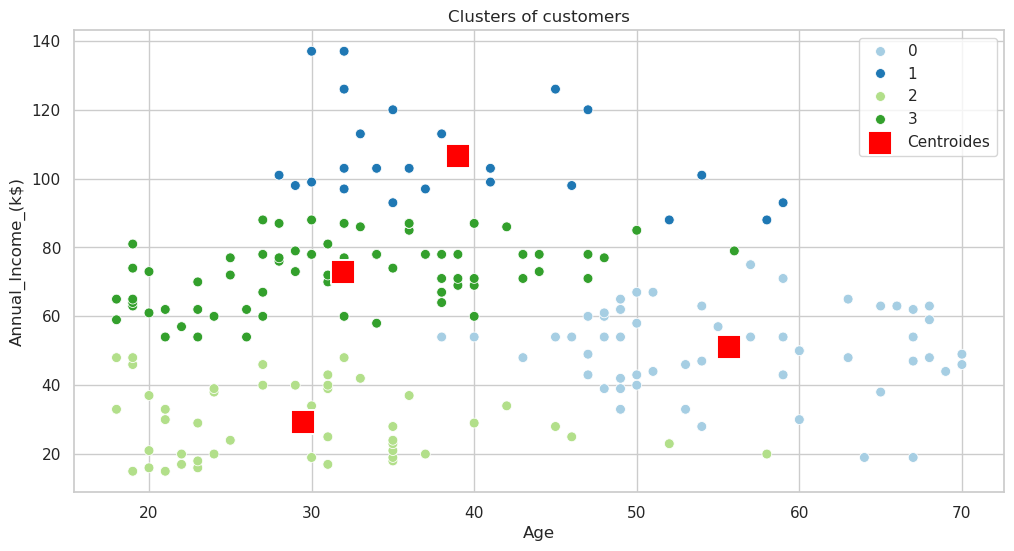

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=X, x ='Age', y='Annual_Income_(k$)', hue='clusters', palette="Paired", s=50)
sns.scatterplot(data=centroides, x=0, y=1, color='red', label='Centroides', s=300, marker=',')
plt.title('Clusters of customers')
plt.xlabel('Age') 
plt.ylabel('Annual_Income_(k$)')
plt.legend()
plt.show()

## Interpretation of Results 

On this graph, the customers age range from 18 to 70 years old  
on the X-axis. On the Y-axis, the customers Annual Incomes range 
from $15k to $140k. 
The model identified 4 distinct customer profiles. Let's analyze them:

Cluster 0 (Light Blue) - "Middle-Income Seniors"
Profile: Located at the bottom right.
Characteristics: Older customers (approx. 45 to 70 years old) with moderate incomes (between $40k and $70k).
Interpretation: A stable population, likely late-career or retired, with a moderate budget.

Cluster 1 (Dark Blue) - "High Income / VIPs"
Profile: Located at the very top.
Characteristics: The wealthiest customers, with incomes exceeding $70k and reaching up to $140k. Ages vary, but they are concentrated between 30 and 50.
Interpretation: This group is "VIP" clientele in terms of financial potential.

Cluster 2 (Light Green) - "The Budget-Conscious"
Profile: Located at the very bottom of the graph.
Characteristics: Low annual income (generally below $40k), spanning a wide age range (18 to 60 years old).
Interpretation: This group has limited purchasing power.

Cluster 3 (Dark Green) - "Young Professionals / Middle Class"
Profile: Located in the middle-left.
Characteristics: Younger customers (approx. 20 to 45 years old) with medium to upper-middle incomes ($40k to $80k).
Interpretation: This is likely the dynamic workforce, currently building their careers.

The red squares represent the mathematical center or the "average customer" for each group.
For example, the centroid for Cluster 1 (High Income) is around 40 years old with an income of ~$105k. 
This represents our ideal target for luxury products.


**Other way to inerpret Results 

Cluster 2,
Marketing Name: Budget,
Recommended Action: "Offer discount coupons, sales, and entry-level products (""Budget-friendly"")."


Cluster 0,
Marketing Name: Traditional Seniors,
Recommended Action:"Focus on products related to comfort, home, health, or leisure. Simple loyalty programs."


Cluster 3,
Marketing Name:Young Pros,
Recommended Action: "Ideal target for ""trendy"" fashion, technology, and gadgets. Marketing via social media (Instagram/TikTok)."


Cluster 1,
Marketing Name:VIP / Luxury,
Recommended Action: "Offer premium services, luxury goods, and exclusive experiences. Price is not a barrier for them."


In [23]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_lavé = scaler.fit_transform(X)

In [24]:
from sklearn.cluster import AgglomerativeClustering

modela = AgglomerativeClustering(n_clusters=4,linkage='ward')

modela

AgglomerativeClustering(n_clusters=4)

In [25]:
pred = modela.fit_predict(X_lavé)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [26]:
silhouette_score(X_lavé,y_pred)

np.float64(0.49174618611125304)

In [27]:
X_lavé_df = pd.DataFrame(X_lavé,columns=X.columns,index = X.index)

In [28]:
X_lavé_df["clusters"] = pred


In [29]:
X_lavé_df

,Age,Annual_Income_(k$),clusters
0,-0.839506,-1.273973,2
1,-0.740741,-1.273973,2
2,-0.790123,-1.246575,2
3,-0.641975,-1.246575,2
4,-0.246914,-1.219178,2
...,...,...,...
195,-0.049383,1.602740,3
196,0.444444,1.767123,3
197,-0.197531,1.767123,3
198,-0.197531,2.068493,3


In [30]:
centroides2 = (X_lavé_df.groupby("clusters").mean()) 

In [31]:
centroides2

,Age,Annual_Income_(k$)
clusters,,
0,-0.199560,0.313943
1,0.970899,-0.287182
2,-0.323614,-0.884582
3,0.148148,1.232877


In [32]:
X_plot = X_lavé_df.copy()



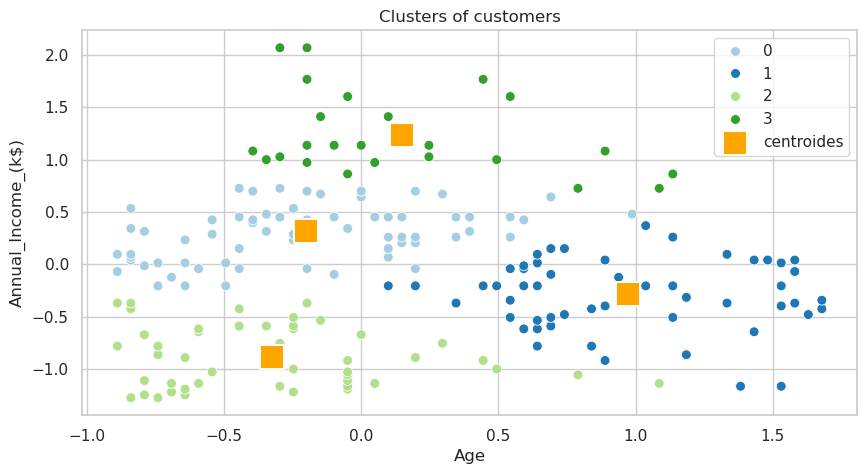

In [33]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=X_lavé_df,x='Age',y="Annual_Income_(k$)",hue="clusters",palette="Paired",s=50)
sns.scatterplot(data=centroides2,x="Age",y="Annual_Income_(k$)",color = "orange",label='centroides',s=300,marker = ',')
plt.title('Clusters of customers')
plt.xlabel('Age') 
plt.ylabel('Annual_Income_(k$)')
plt.legend()
plt.show()



In [34]:
X_lavé_df

,Age,Annual_Income_(k$),clusters
0,-0.839506,-1.273973,2
1,-0.740741,-1.273973,2
2,-0.790123,-1.246575,2
3,-0.641975,-1.246575,2
4,-0.246914,-1.219178,2
...,...,...,...
195,-0.049383,1.602740,3
196,0.444444,1.767123,3
197,-0.197531,1.767123,3
198,-0.197531,2.068493,3
